On mets en place les méthodes de clustering. On jugera de la meilleur en regardant les scors de silhouette

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Chargement des données
file_path = 'md_for_Python.csv'  # Remplacez par le chemin de votre fichier

data = pd.read_csv(file_path, delimiter=";")

# Préparation des données (exclure la première colonne)
X = data.iloc[:, 1:]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialisation des dictionnaires pour stocker les labels et les scores de silhouette
labels_dict = {}
silhouette_scores = {}

# DBSCAN
dbscan = DBSCAN(eps=1, min_samples=2)
labels_dbscan = dbscan.fit_predict(X_scaled)
labels_dict['DBSCAN'] = labels_dbscan
silhouette_scores['DBSCAN'] = silhouette_score(X_scaled, labels_dbscan)

# K-means
for k in range(2, 6):  # Tester pour différents nombres de clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)  # Ajout de n_init=10
    labels_kmeans = kmeans.fit_predict(X_scaled)
    labels_dict[f'KMeans_{k}'] = labels_kmeans
    silhouette_scores[f'KMeans_{k}'] = silhouette_score(X_scaled, labels_kmeans)

# Clustering hiérarchique
for n_clusters in range(2, 6):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels_hierarchical = hierarchical.fit_predict(X_scaled)
    labels_dict[f'Hierarchical_{n_clusters}'] = labels_hierarchical
    silhouette_scores[f'Hierarchical_{n_clusters}'] = silhouette_score(X_scaled, labels_hierarchical)

# Clustering spectral
for n_clusters in range(2, 6):
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=0, affinity='nearest_neighbors')
    labels_spectral = spectral.fit_predict(X_scaled)
    labels_dict[f'Spectral_{n_clusters}'] = labels_spectral
    silhouette_scores[f'Spectral_{n_clusters}'] = silhouette_score(X_scaled, labels_spectral)

# Affichage des scores de silhouette
for method, score in silhouette_scores.items():
    print(f"{method}: Silhouette Score = {score:.3f}")

DBSCAN: Silhouette Score = 0.507
KMeans_2: Silhouette Score = 0.481
KMeans_3: Silhouette Score = 0.536
KMeans_4: Silhouette Score = 0.497
KMeans_5: Silhouette Score = 0.518
Hierarchical_2: Silhouette Score = 0.481
Hierarchical_3: Silhouette Score = 0.536
Hierarchical_4: Silhouette Score = 0.492
Hierarchical_5: Silhouette Score = 0.512
Spectral_2: Silhouette Score = 0.481
Spectral_3: Silhouette Score = 0.536
Spectral_4: Silhouette Score = 0.497
Spectral_5: Silhouette Score = 0.504


Sur la base de ces scores, les meilleures méthodes pour les données semblent être :

K-Means avec 3 clusters
Clustering Hiérarchique avec 3 clusters
Clustering Spectral avec 3 clusters
Toutes ces méthodes ont obtenu un score de silhouette de 0.536, ce qui est le plus élevé parmi les méthodes testées. Cela suggère que ces méthodes sont les plus efficaces pour séparer vos données en groupes distincts et cohérents.

In [2]:
# Extraction des labels pour les trois meilleures méthodes de clustering
labels_kmeans_3 = labels_dict['KMeans_3']
labels_hierarchical_3 = labels_dict['Hierarchical_3']
labels_spectral_3 = labels_dict['Spectral_3']

# Ajout des labels de clustering au DataFrame original
data['Cluster_KMeans_3'] = labels_kmeans_3
data['Cluster_Hierarchical_3'] = labels_hierarchical_3
data['Cluster_Spectral_3'] = labels_spectral_3

# Création de dictionnaires pour stocker les espèces dans chaque cluster pour chaque méthode
species_in_clusters = {
    'KMeans_3': {},
    'Hierarchical_3': {},
    'Spectral_3': {}
}

# Remplissage des dictionnaires avec les espèces pour chaque cluster
for i in range(3):  # Nous avons 3 clusters dans chaque méthode
    species_in_clusters['KMeans_3'][i] = data[data['Cluster_KMeans_3'] == i]['name'].tolist()
    species_in_clusters['Hierarchical_3'][i] = data[data['Cluster_Hierarchical_3'] == i]['name'].tolist()
    species_in_clusters['Spectral_3'][i] = data[data['Cluster_Spectral_3'] == i]['name'].tolist()

species_in_clusters


{'KMeans_3': {0: ['Opossum',
   'Hairy tail mole',
   'Common mole',
   'Star nose mole',
   'Brown bat',
   'Silver hair bat',
   'Pigmy bat',
   'House bat',
   'Red bat',
   'Hoary bat',
   'Lump nose bat',
   'Coyote',
   'Wolf',
   'Fox',
   'Bear',
   'Civet cat',
   'Raccoon',
   'Marten',
   'Fisher',
   'Weasel',
   'Mink',
   'Ferrer',
   'Wolverine',
   'Badger',
   'Skunk',
   'River otter',
   'Sea otter',
   'Jaguar',
   'Ocelot',
   'Cougar',
   'Lynx',
   'Fur seal',
   'Sea lion',
   'Walrus',
   'Grey seal',
   'Elephant seal',
   'Peccary'],
  1: ['Armadillo',
   'Pika',
   'Snowshoe rabbit',
   'Beaver',
   'Marmot',
   'Groundhog',
   'Prairie Dog',
   'Ground Squirrel',
   'Chipmunk',
   'Gray squirrel',
   'Fox squirrel',
   'Pocket gopher',
   'Kangaroo rat',
   'Pack rat',
   'Field mouse',
   'Muskrat',
   'Black rat',
   'House mouse',
   'Porcupine',
   'Guinea pig'],
  2: ['Elk',
   'Deer',
   'Moose',
   'Reindeer',
   'Antelope',
   'Bison',
   'Mountain 

1. K-Means avec 3 clusters :

Cluster 0 : Ce cluster regroupe principalement des mammifères carnivores et omnivores, incluant des prédateurs de taille moyenne à grande (comme les ours, les loups et les renards), des mammifères marins (comme les phoques et les lions de mer), et des chauves-souris. Ces espèces sont adaptées à une variété d'habitats et ont des régimes alimentaires diversifiés.
Cluster 1 : Ici, nous trouvons des mammifères principalement petits à moyens, herbivores et omnivores, qui incluent des lapins, des castors, des écureuils et des rongeurs comme les rats. Ces espèces sont souvent terrestres, adaptées au fouissage ou à la vie dans les arbres, et ont des régimes alimentaires axés sur les végétaux.
Cluster 2 : Ce cluster est composé de grands mammifères herbivores comme les cerfs, les élans, les antilopes et les bisons. Ces animaux sont adaptés à la vie dans des habitats ouverts et se nourrissent principalement de graminées et d'autres végétations.


2. Clustering Hiérarchique avec 3 clusters :

Cluster 0 : Similaire au Cluster 0 de K-Means, ce cluster inclut des mammifères carnivores et omnivores de diverses tailles, ainsi que des mammifères marins et des chauves-souris. Ils présentent une diversité d'adaptations à différents habitats et régimes alimentaires.
Cluster 1 : Correspondant au Cluster 1 de K-Means, ce groupe comprend des mammifères plus petits, principalement herbivores et omnivores, y compris des rongeurs et des animaux fouisseurs ou arboricoles, avec une tendance à consommer des plantes ou un régime mixte.
Cluster 2 : Tout comme dans K-Means, ce cluster rassemble de grands herbivores adaptés à des espaces ouverts, tels que les cerfs, les élans et les bisons, caractérisés par un régime alimentaire herbivore.


3. Clustering Spectral avec 3 clusters :

Cluster 0 : Ce cluster est identique au Cluster 0 des deux méthodes précédentes, regroupant une variété de mammifères carnivores et omnivores, des mammifères marins et des chauves-souris, illustrant une grande diversité dans leurs adaptations écologiques.
Cluster 1 : Contrairement aux autres méthodes, ce cluster est celui des grands herbivores dans le Clustering Spectral. Il inclut des espèces comme les cerfs, les élans et les bisons, adaptés à la vie dans des habitats ouverts et ayant un régime alimentaire basé sur les plantes.
Cluster 2 : Ce cluster correspond au Cluster 1 de K-Means et regroupe de petits à moyens mammifères herbivores et omnivores, tels que des lapins, des écureuils et des rongeurs, adaptés à un mode de vie terrestre et à une alimentation végétarienne ou mixte.

Carnivores :

Exemples : Ours, loup, renard, lynx, coyote, badger, wolverine, civet cat, weasel, marten, mink, skunk.

Herbivores :

Exemples : Bison, cerf, élan, antilope, moose, mountain goat, mountain sheep, musk ox, guinea pig, snowshoe rabbit.

Omnivores :

Exemples : Raccoon, opossum, peccary.

Mammifères marins :

Exemples : Phoque, lion de mer, otarie, morse, elephant seal, sea otter.

Rongeurs :

Exemples : Beaver, groundhog, marmot, prairie dog, field mouse, house mouse, black rat, chipmunk, gray squirrel, fox squirrel, kangaroo rat, pack rat, pocket gopher, porcupine.

Chauves-souris :

Exemples : Brown bat, hoary bat, house bat, red bat, silver hair bat, pigmy bat, lump nose bat.

Autres petits mammifères :

Exemples : Armadillo, common mole, hairy tail mole, pika, star nose mole.

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Charger les données
file_path = 'md_for_Python.csv'  # Remplacez par le chemin de votre fichier
data = pd.read_csv(file_path, delimiter=";")

# Préparation des données pour le clustering (exclure la première colonne)
X = data.iloc[:, 1:]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Catégories manuelles
categories = {
    'Carnivores': ['Bear', 'Wolf', 'Fox', 'Lynx', 'Coyote', 'Badger', 'Wolverine', 'Civet Cat', 'Weasel', 'Marten', 'Mink', 'Skunk', 'Ocelot', 'Cougar', 'Jaguar'],
    'Herbivores': ['Bison', 'Deer', 'Elk', 'Antelope', 'Moose', 'Mountain Goat', 'Mountain Sheep', 'Musk Ox', 'Guinea Pig', 'Snowshoe Rabbit', 'Peccary'],
    'Omnivores': ['Raccoon', 'Opossum'],
    'Mammifères Marins': ['Fur Seal', 'Sea Lion', 'Walrus', 'Elephant Seal', 'Sea Otter', 'Grey Seal'],
    'Rongeurs': ['Beaver', 'Groundhog', 'Marmot', 'Prairie Dog', 'Field Mouse', 'House Mouse', 'Black Rat', 'Chipmunk', 'Gray Squirrel', 'Fox Squirrel', 'Kangaroo Rat', 'Pack Rat', 'Pocket Gopher', 'Porcupine', 'Muskrat'],
    'Chauves-souris': ['Brown Bat', 'Hoary Bat', 'House Bat', 'Red Bat', 'Silver Hair Bat', 'Pigmy Bat', 'Lump Nose Bat'],
    'Autres Petits Mammifères': ['Armadillo', 'Common Mole', 'Hairy Tail Mole', 'Pika', 'Star Nose Mole']
}

# Mappage des animaux à leurs catégories
categorie_mapping = {animal.lower(): cat for cat, animaux in categories.items() for animal in animaux}
y = data['name'].str.lower().map(categorie_mapping)

# Classification manuelle pour les animaux non classés
classifications_manuelles = {
    'Ground Squirrel': 'Rongeurs',
    'Fisher': 'Carnivores',
    'Ferrer': 'Carnivores',  # Classification assumée comme carnivore en l'absence d'informations spécifiques
    'River otter': 'Mammifères Marins',
    'Reindeer': 'Herbivores'
}
for animal, category in classifications_manuelles.items():
    categorie_mapping[animal.lower()] = category

y_final = data['name'].str.lower().map(categorie_mapping)

# Préparation des données pour l'entraînement et le test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_final, test_size=0.3, random_state=42)

# Création et entraînement du modèle k-NN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Évaluation du modèle
accuracy = knn.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.65


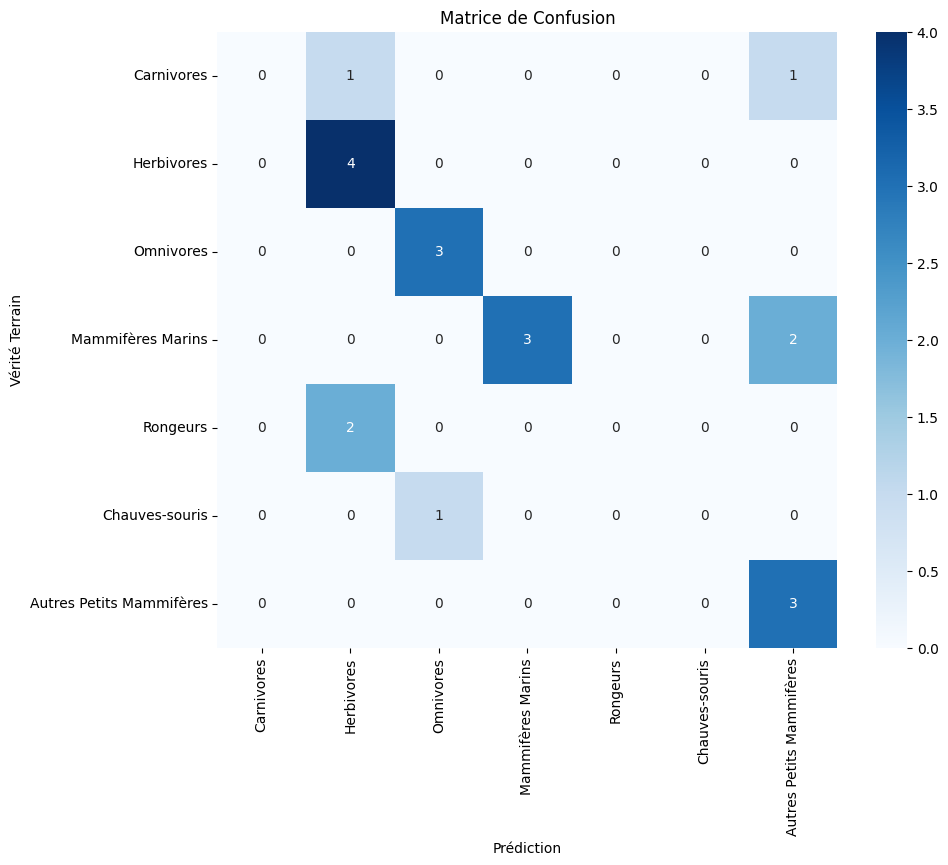

                          precision    recall  f1-score   support

Autres Petits Mammifères       0.00      0.00      0.00         2
              Carnivores       0.57      1.00      0.73         4
          Chauves-souris       0.75      1.00      0.86         3
              Herbivores       1.00      0.60      0.75         5
       Mammifères Marins       0.00      0.00      0.00         2
               Omnivores       0.00      0.00      0.00         1
                Rongeurs       0.50      1.00      0.67         3

                accuracy                           0.65        20
               macro avg       0.40      0.51      0.43        20
            weighted avg       0.55      0.65      0.56        20



c:\Users\decroux paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\decroux paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\decroux paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Prédiction sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=categories.keys(), columns=categories.keys())

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title('Matrice de Confusion')
plt.ylabel('Vérité Terrain')
plt.xlabel('Prédiction')
plt.show()

# Affichage du rapport de classification
print(classification_report(y_test, y_pred))


In [9]:
from sklearn.model_selection import GridSearchCV

# Définir la grille de paramètres pour k
param_grid = {'n_neighbors': range(1, 31)}

# Créer un modèle k-NN
knn = KNeighborsClassifier()

# Créer GridSearchCV pour trouver le meilleur k
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

# Entraîner le modèle GridSearchCV avec les données d'entraînement
knn_gscv.fit(X_train, y_train)

# Le meilleur paramètre k
best_k = knn_gscv.best_params_['n_neighbors']
print(f'Meilleur k: {best_k}')

# Créer et entraîner le modèle k-NN avec le meilleur k
knn_optimized = KNeighborsClassifier(n_neighbors=best_k)
knn_optimized.fit(X_train, y_train)

# Évaluer le modèle optimisé
accuracy_optimized = knn_optimized.score(X_test, y_test)
print(f'Accuracy avec k optimisé: {accuracy_optimized:.2f}')


c:\Users\decroux paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Meilleur k: 3
Accuracy avec k optimisé: 0.70


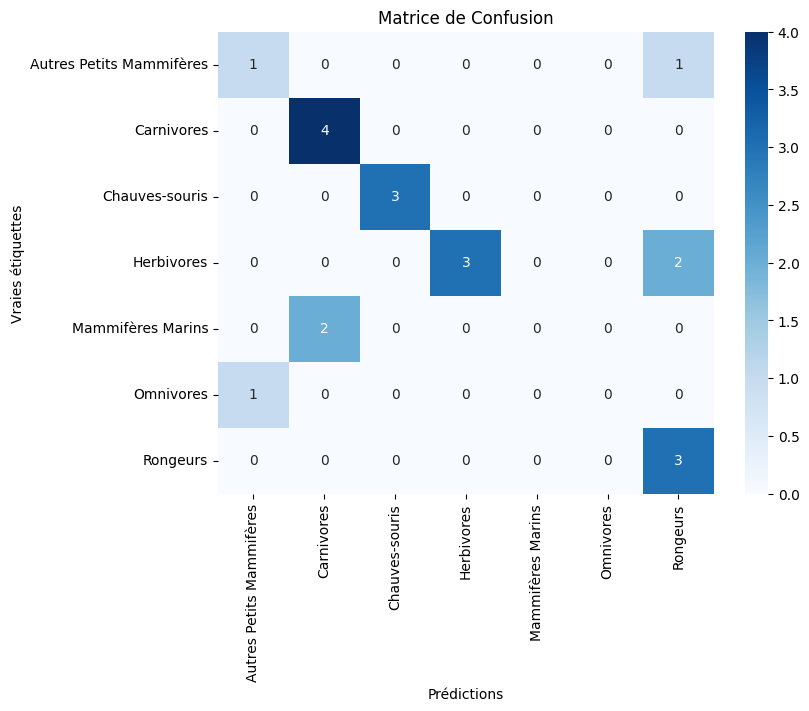

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Faire des prédictions sur le jeu de données de test avec le modèle optimisé
y_pred = knn_optimized.predict(X_test)

# Calculer la matrice de confusion
confusion_mat = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=knn_optimized.classes_, yticklabels=knn_optimized.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()
